In [62]:
#!pip install tflearn
!pip install tensorflow
#!pip install git+https://github.com/tflearn/tflearn.git
#!pip uninstall tensorflow
#!pip install tensorflow==1.15
# Or a different version where is_sequence is present

In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [64]:
im_path="/content/bill.jfif"
img=cv2.imread(im_path)
print(img.shape)

(345, 460, 3)


(800, 1500, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

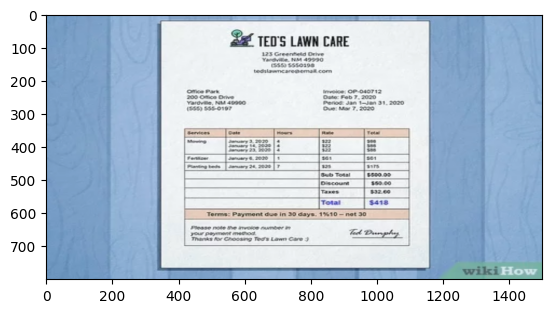

In [65]:
img=cv2.resize(img,(1500,800))
print (img.shape)

plt.imshow(img)
plt.show

In [66]:
#blur image
#edge Detection
#Best concurretn selection
#project to the screen

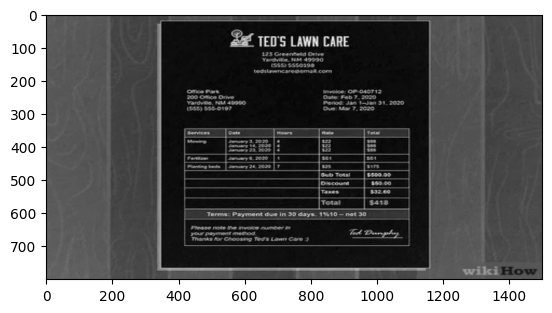

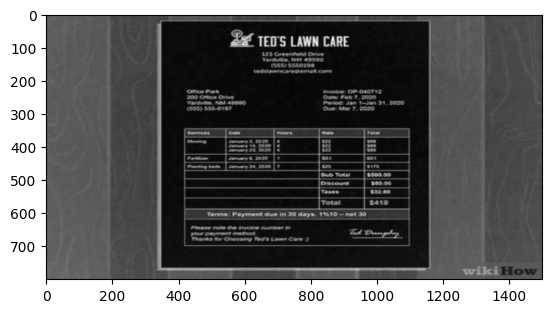

In [67]:
#Remove noise
#img bluring
orig=img.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="binary")
plt.show()
blurred=cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blurred,cmap="binary")
plt.show()

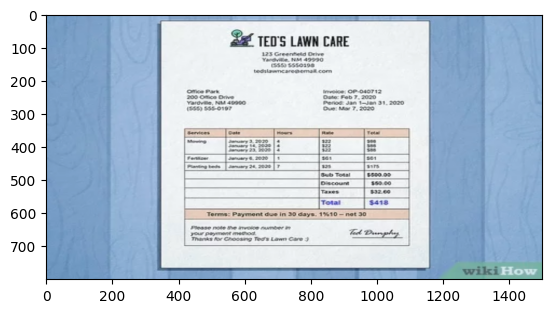

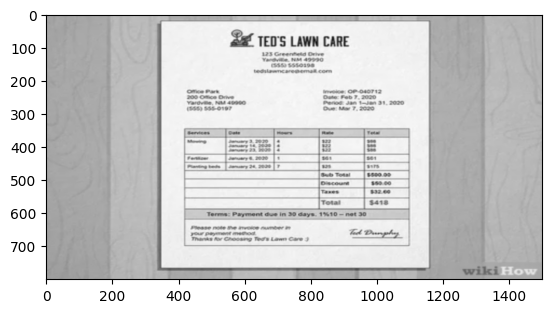

In [68]:
regen=cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

In [69]:
regen.shape

(800, 1500, 3)

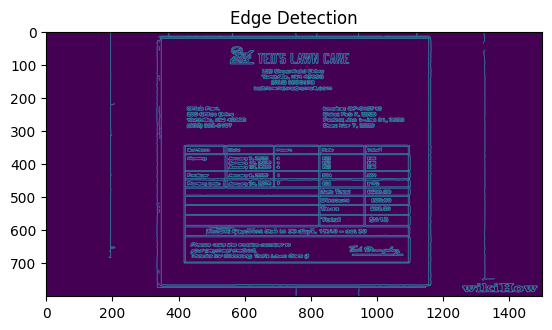

In [70]:
#Edge Detection
edge=cv2.Canny(blurred,0,50)
orig_edge=edge.copy()
plt.title("Edge Detection")
plt.imshow(orig_edge)
plt.show()


In [71]:
#Countours Extraction
contours,_=cv2.findContours(edge,cv2.RETR_LIST
                 ,cv2.CHAIN_APPROX_NONE)

In [72]:
contours

(array([[[1272,  779]],
 
        [[1273,  778]],
 
        [[1274,  779]],
 
        [[1273,  780]]], dtype=int32),
 array([[[946, 777]],
 
        [[946, 778]],
 
        [[946, 779]],
 
        [[946, 780]],
 
        [[946, 781]],
 
        [[946, 782]],
 
        [[945, 783]],
 
        [[946, 784]],
 
        [[946, 785]],
 
        [[946, 786]],
 
        [[945, 787]],
 
        [[945, 788]],
 
        [[945, 789]],
 
        [[945, 790]],
 
        [[945, 791]],
 
        [[945, 792]],
 
        [[945, 793]],
 
        [[946, 794]],
 
        [[946, 795]],
 
        [[945, 796]],
 
        [[945, 797]],
 
        [[946, 798]],
 
        [[946, 799]],
 
        [[946, 798]],
 
        [[945, 797]],
 
        [[945, 796]],
 
        [[946, 795]],
 
        [[946, 794]],
 
        [[945, 793]],
 
        [[945, 792]],
 
        [[945, 791]],
 
        [[945, 790]],
 
        [[945, 789]],
 
        [[945, 788]],
 
        [[945, 787]],
 
        [[946, 786]],
 
        [[946, 785]

In [73]:
print(len(contours))
contours=sorted(contours,key=cv2.contourArea,reverse=True)

1045


In [74]:
for c in contours:
  peri=cv2.arcLength(c,True)
  approx=cv2.approxPolyDP(c,0.02*peri,True)
  if len(approx)==4:
    target=approx
    break
print(target.shape)

(4, 1, 2)


In [75]:
##re order the contor

def reorder(myPoints):
  myPoints=myPoints.reshape((4,2))
  myPointsNew=np.zeros((4,1,2),np.int32)

  add=myPoints.sum(axis=1)
  myPointsNew[0]=myPoints[np.argmax(add)]
  myPointsNew[3]=myPoints[np.argmin(add)]
  diff=np.diff(myPoints,axis=1)
  myPointsNew[1]=myPoints[np.argmin(diff)]
  myPointsNew[2]=myPoints[np.argmax(diff)]
  return myPointsNew

In [76]:
reorder=reorder(target)
print("*****************")
print(reorder)

*****************
[[[1162  767]]

 [[1163   21]]

 [[ 336  773]]

 [[ 346   19]]]


In [77]:
#project to the fixed scree
input_representation = reorder.reshape((4,2)).astype(np.float32) # Reshape and change type
output_representation = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [78]:
M=cv2.getPerspectiveTransform(input_representation,output_representation)
ans=cv2.warpPerspective(orig,M,(800,800))

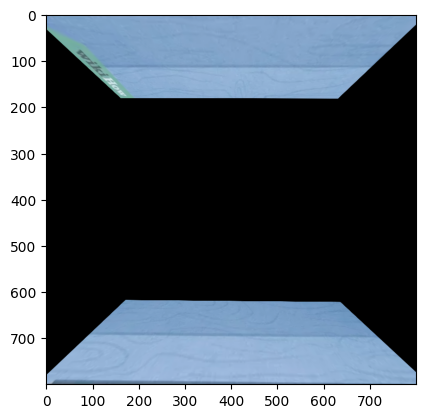

In [80]:
plt.imshow(ans)
plt.show()

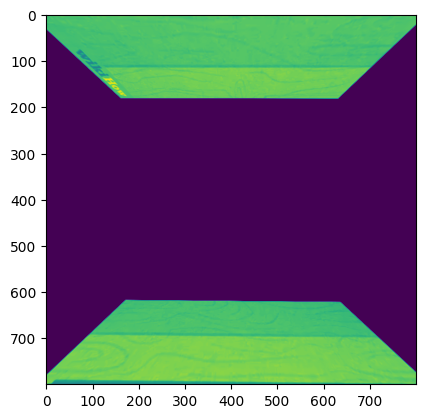

In [82]:
res=cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)
plt.imshow(res)
plt.show()